In [2]:
import warnings
warnings.filterwarnings('ignore')


import gc
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
from tqdm import tqdm

from tools import *

In [3]:
s_features = ['B_HYC_NH4', 'B_HYC_XD', 'B_HYC_MLSS', 'B_HYC_JS_DO', 'B_HYC_DO',
       'B_CS_MQ_SSLL', 'B_QY_ORP']
n_features = ['N_HYC_NH4', 'N_HYC_XD', 'N_HYC_MLSS',
       'N_HYC_JS_DO', 'N_HYC_DO', 'N_CS_MQ_SSLL', 'N_QY_ORP']
base_features = ['JS_NH3', 'CS_NH3', 'JS_TN', 'CS_TN', 'JS_LL', 'CS_LL',
       'MCCS_NH4', 'MCCS_NO3', 'JS_COD', 'CS_COD', 'JS_SW', 'CS_SW',]

all_features = base_features + s_features + n_features

In [4]:
train_data = pd.read_csv(r'./data/train_dataset.csv')
test_data = pd.read_csv(r'./data/evaluation_public.csv')

train_data['istest'] = 0
test_data['istest'] = 1
data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
del train_data, test_data
gc.collect()
data.shape

(150480, 30)

In [5]:
data['time'] = pd.to_datetime(data['time'])

data['month'] = data['time'].dt.month
data['minute'] = data['time'].dt.minute

data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour
data['dayofweek'] = data['time'].dt.dayofweek

data['minute10'] = (data['minute'] // 10) * 10

data['hourl'] = data['day'] * 24 + data['hour']
data['hourl'] = data['hourl'] - data['hourl'].min() # 将时转换成连续递增序列

data['minute10l'] = data['hourl'] * 60 + data['minute10']
data['minute10l'] = data['minute10l'] - data['minute10l'].min()  # 将分转换成连续递增序列
data['ts'] = pd.to_datetime(data['time'], format='%Y/%m/%d %H:%M').dt.strftime("%Y%m%d%H%M")

data = data.sort_values(by='ts')

# plot

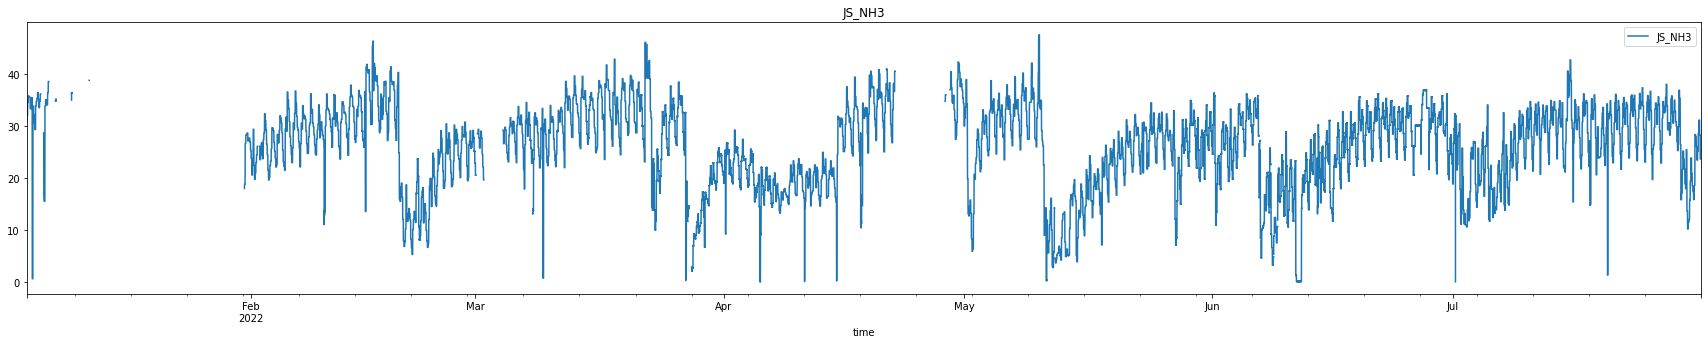

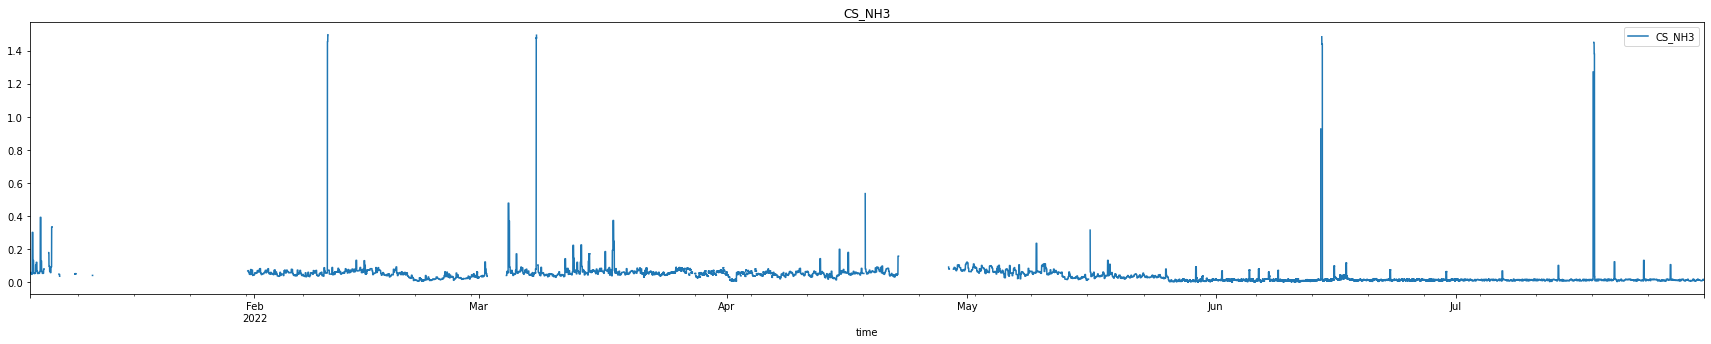

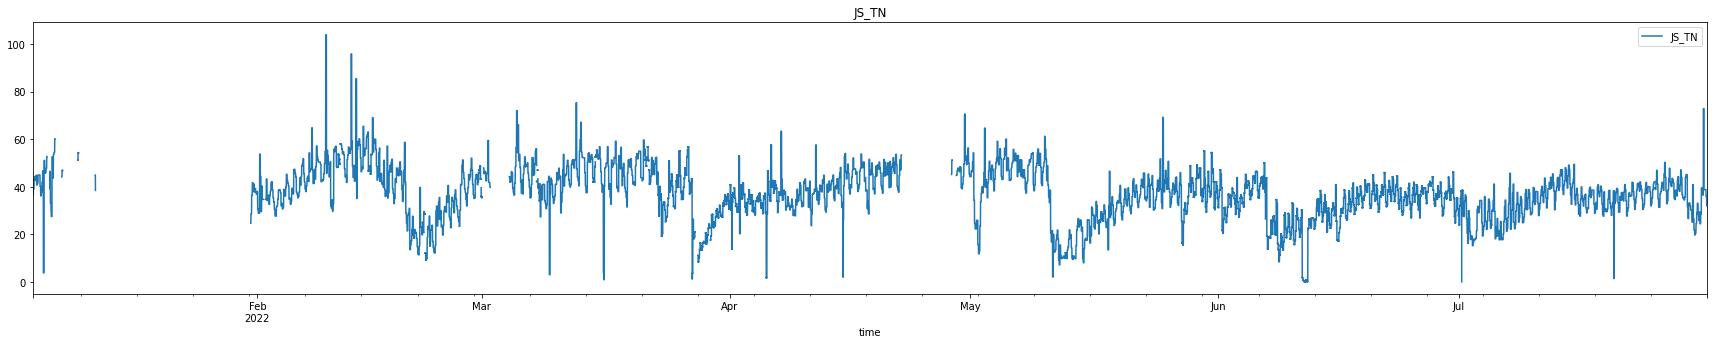

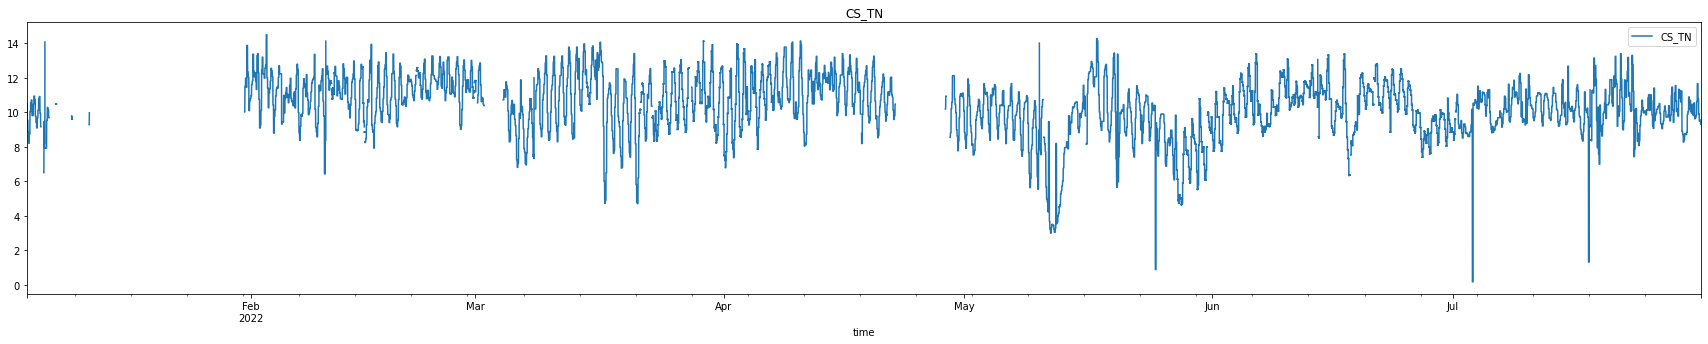

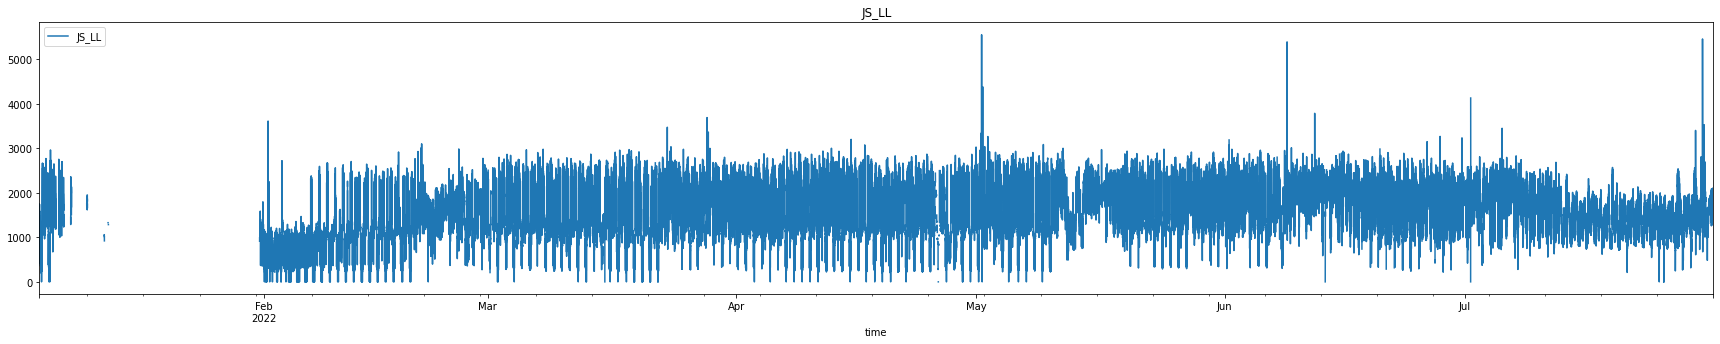

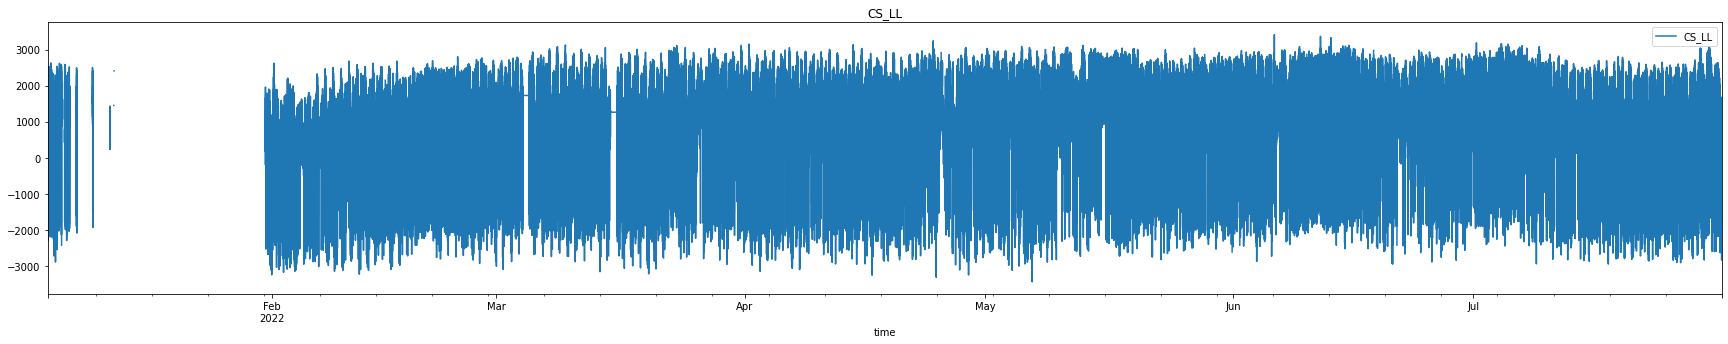

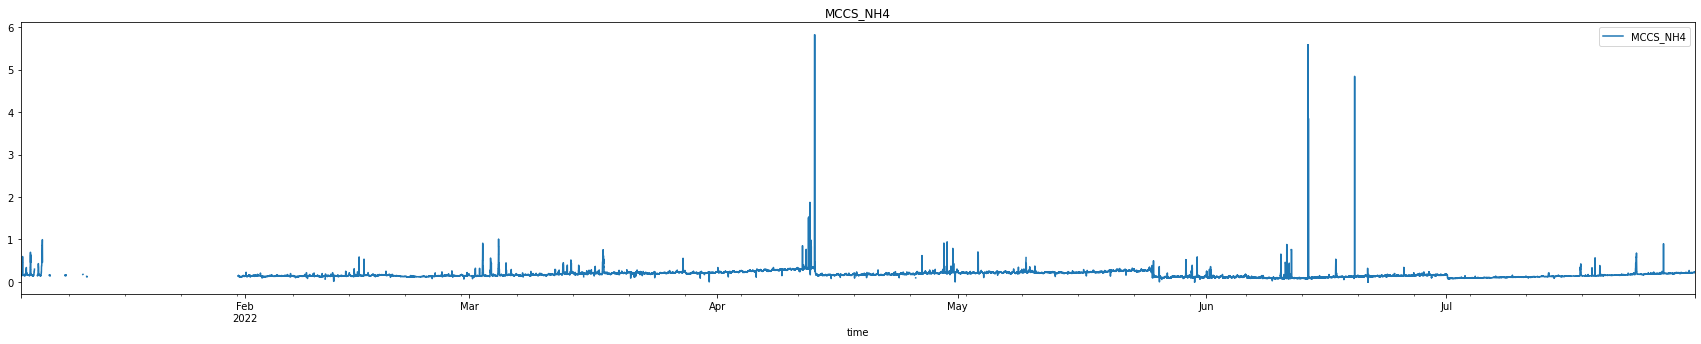

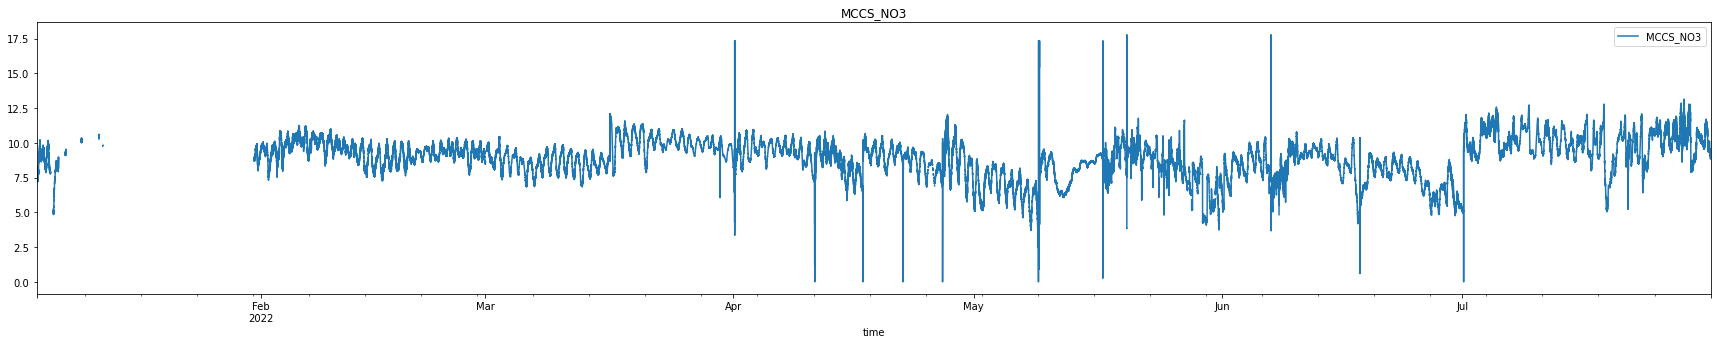

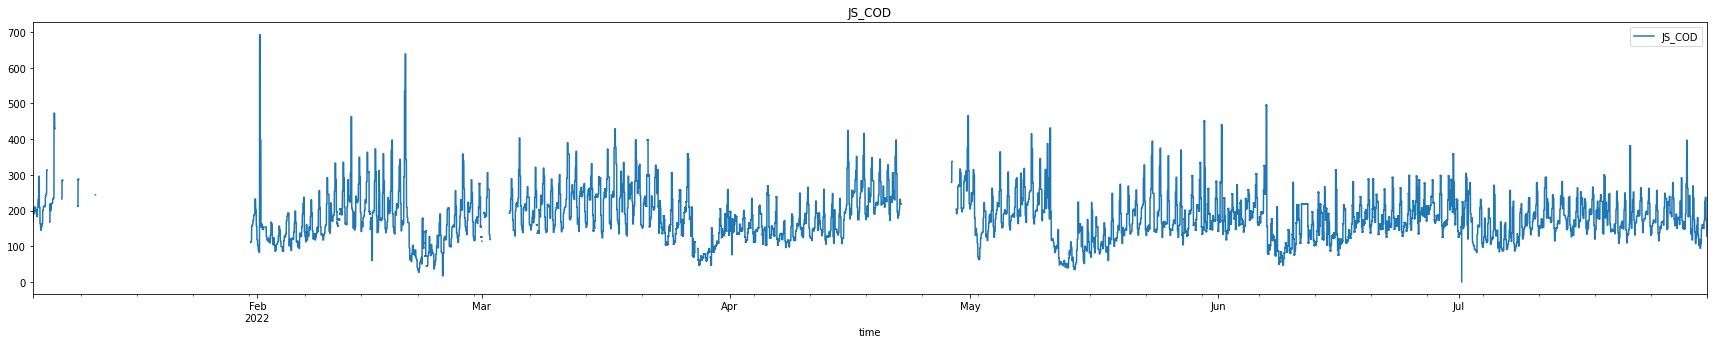

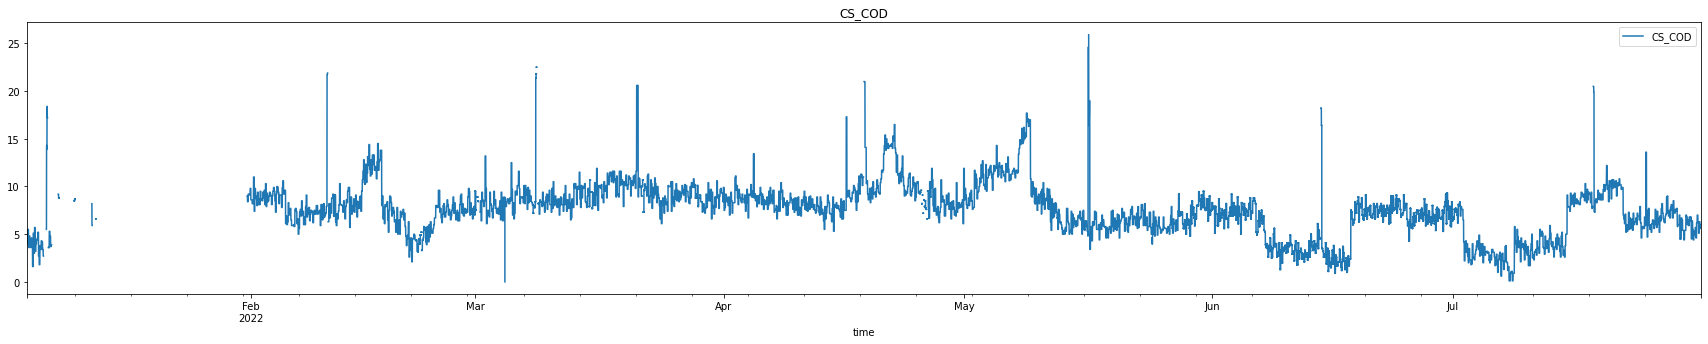

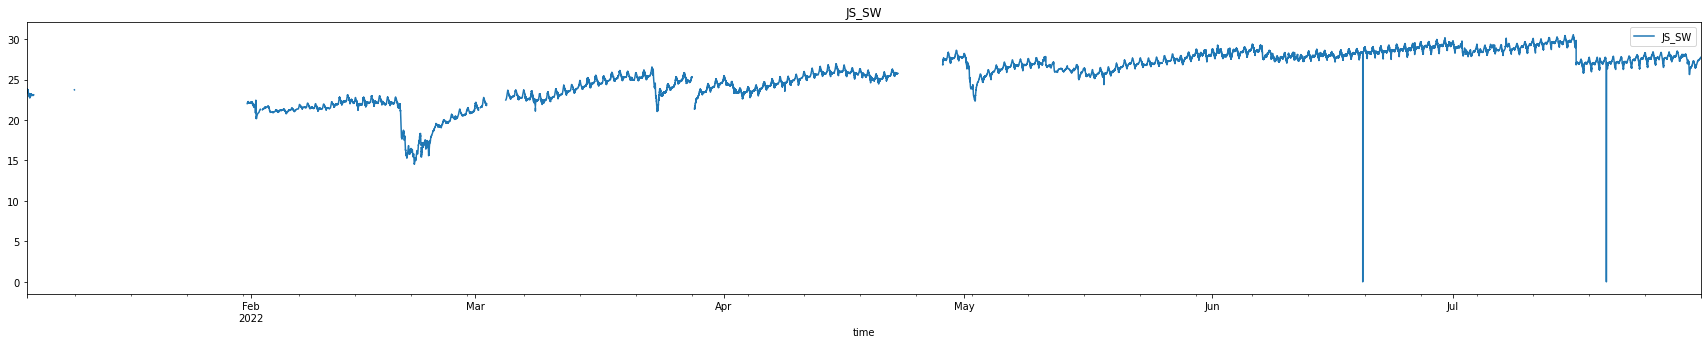

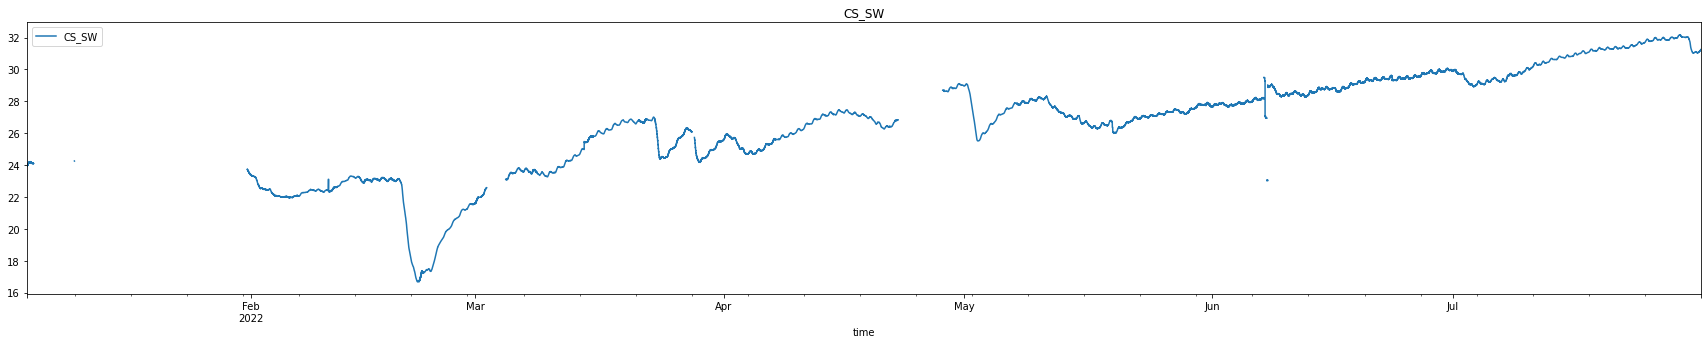

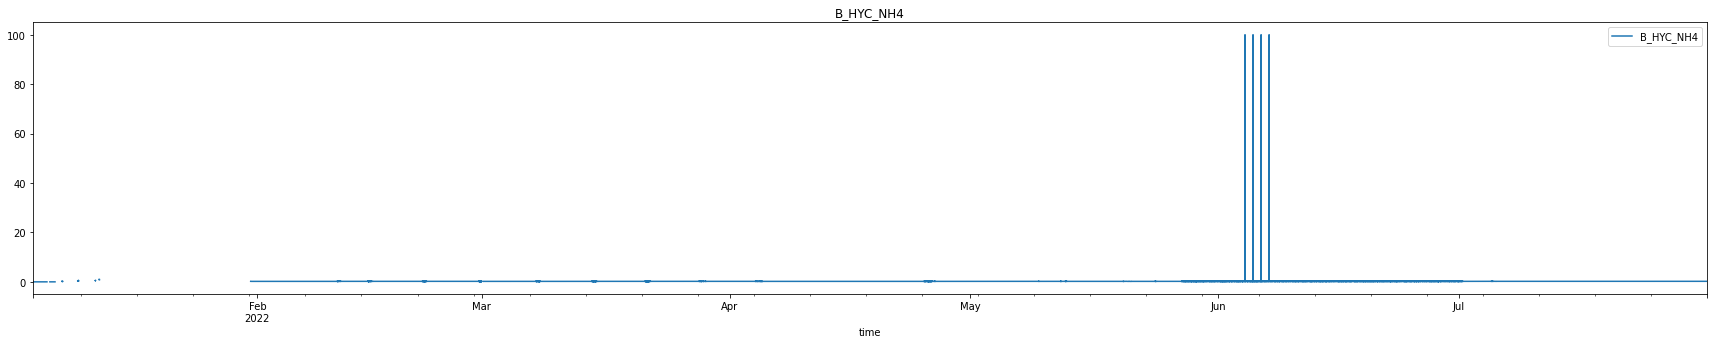

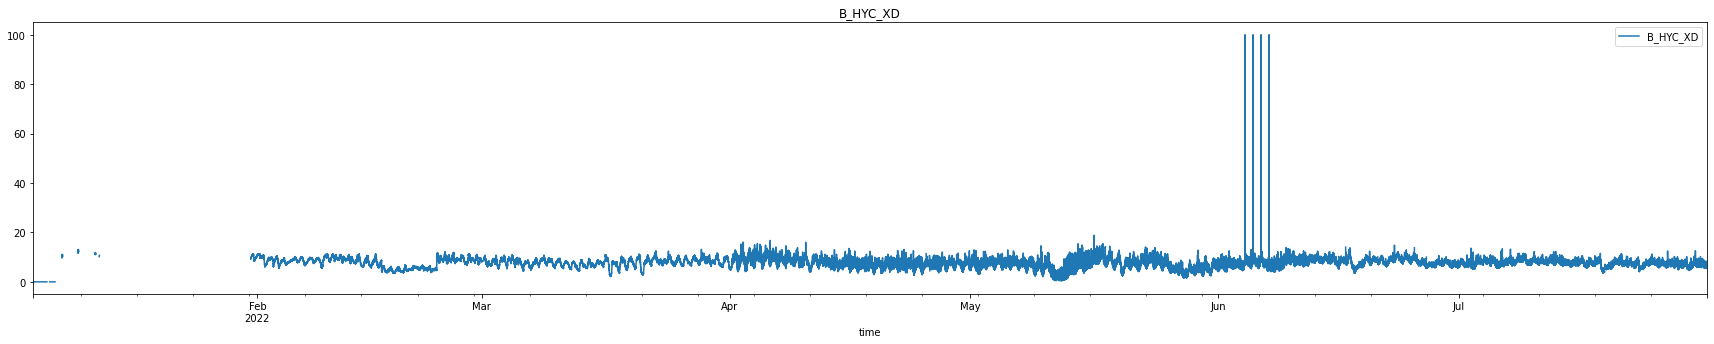

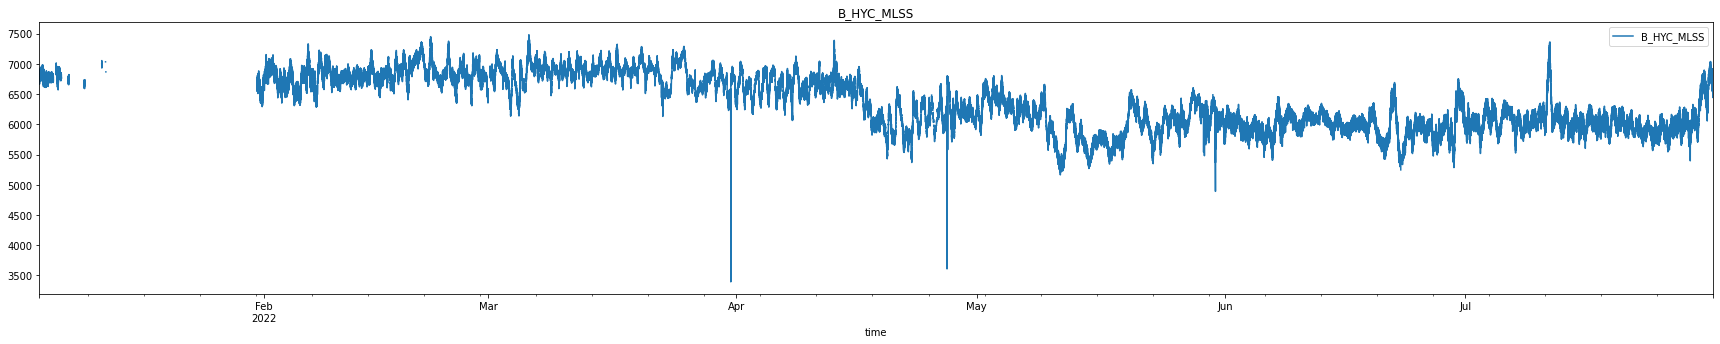

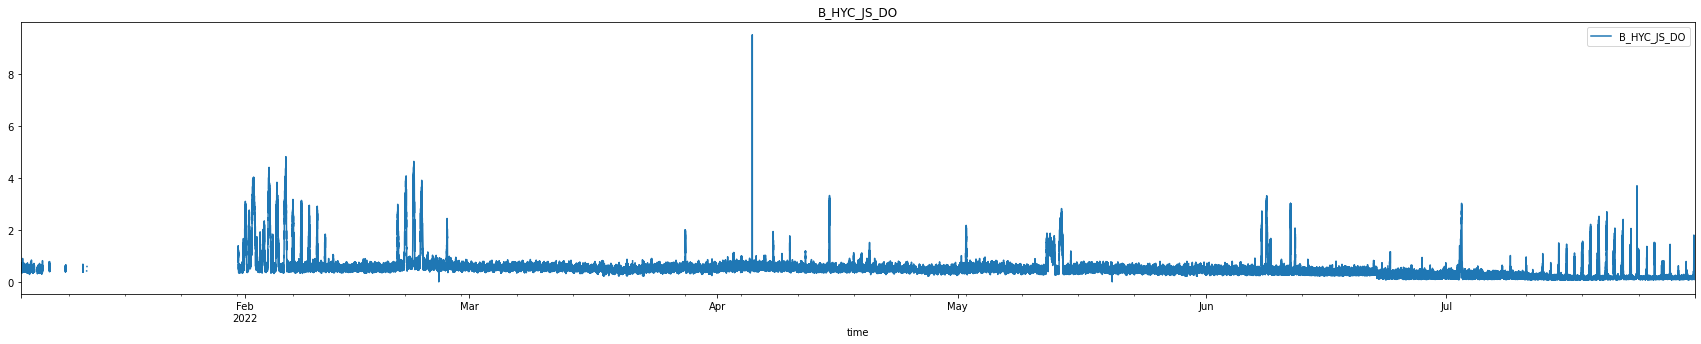

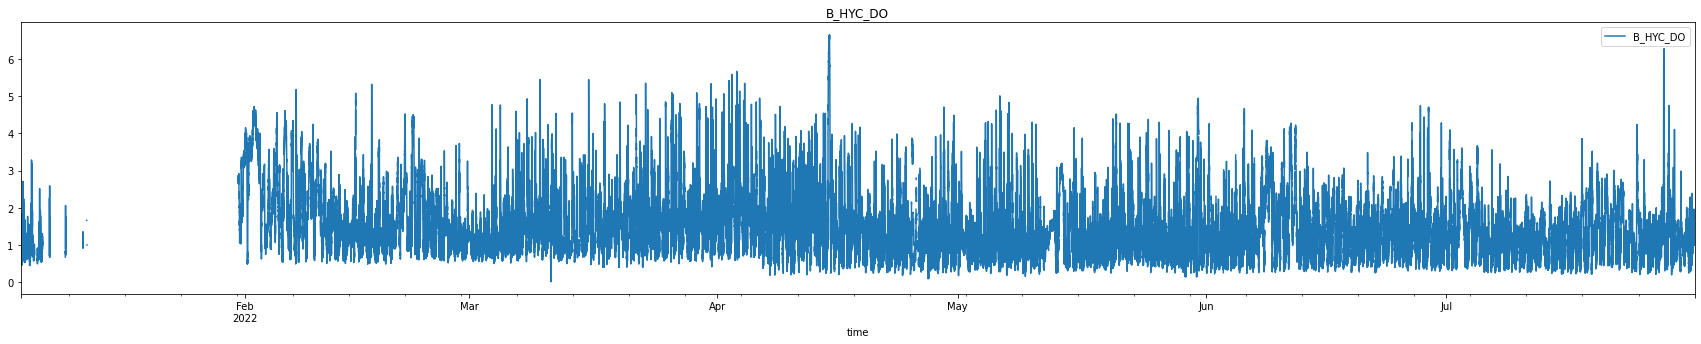

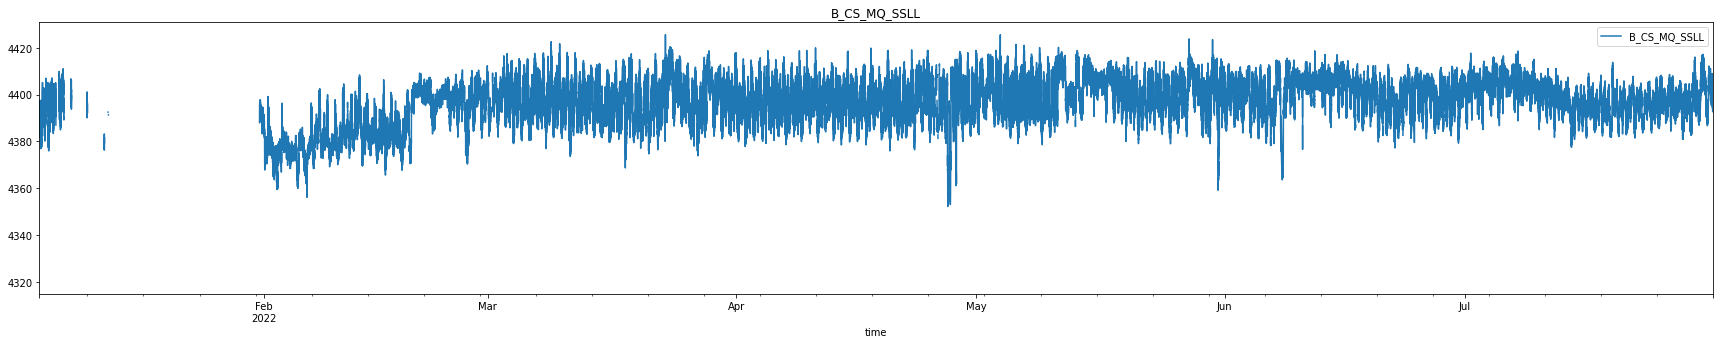

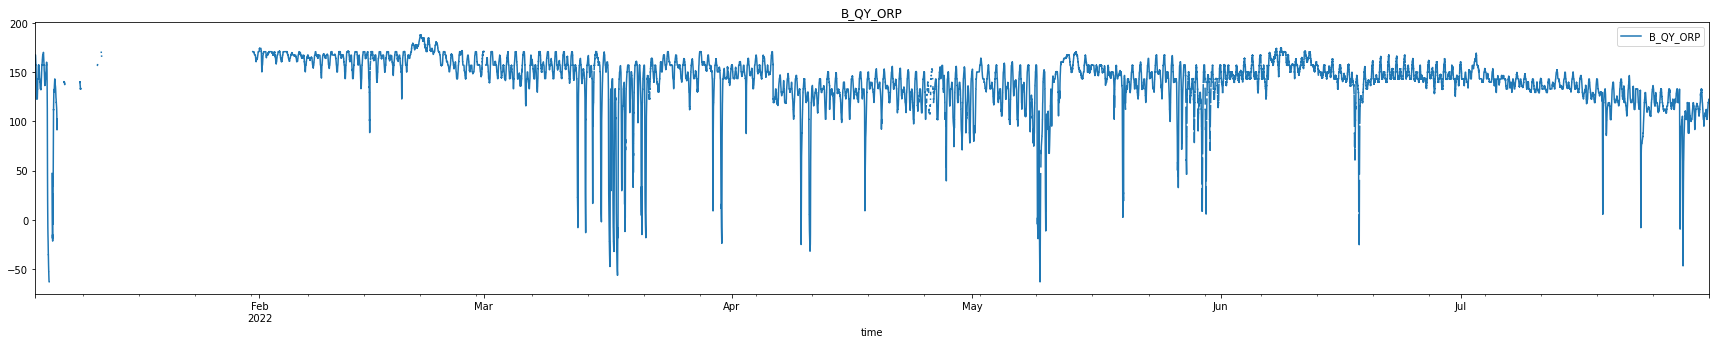

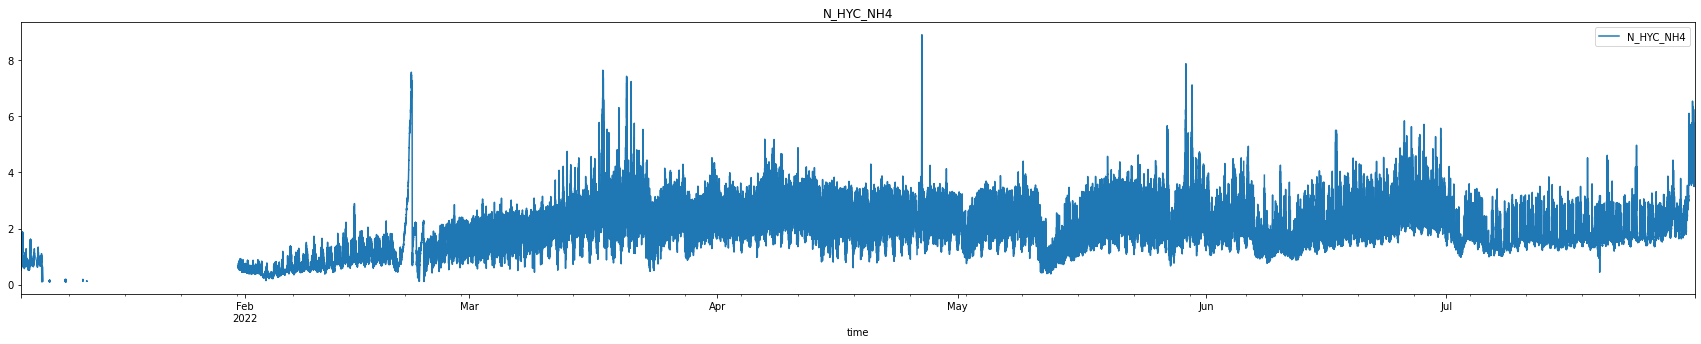

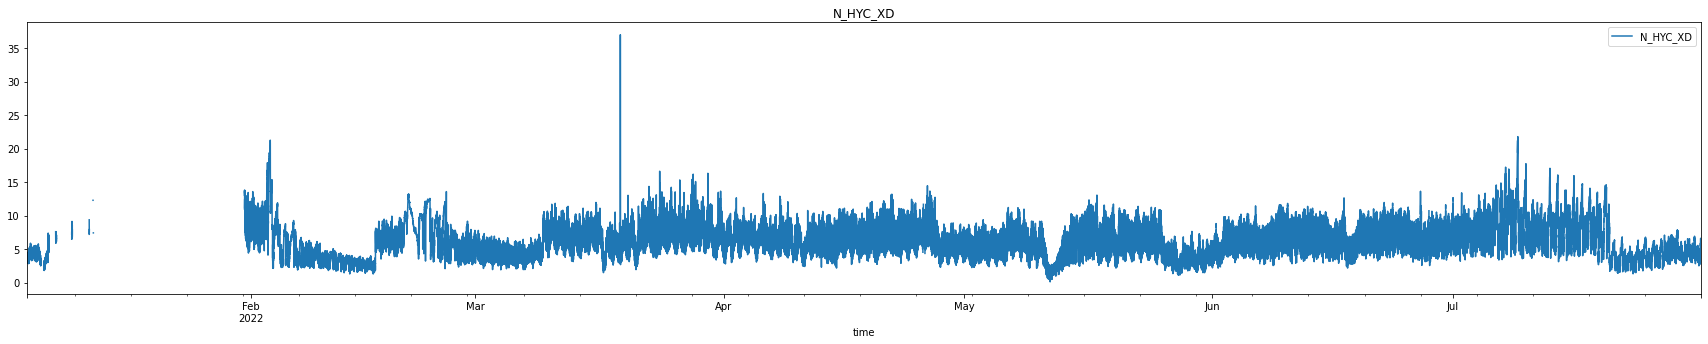

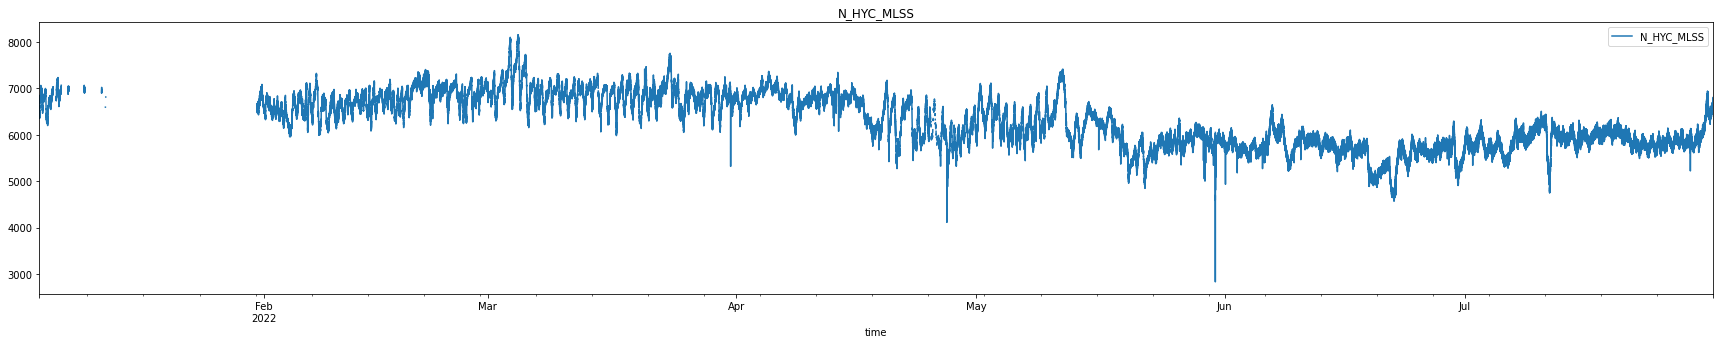

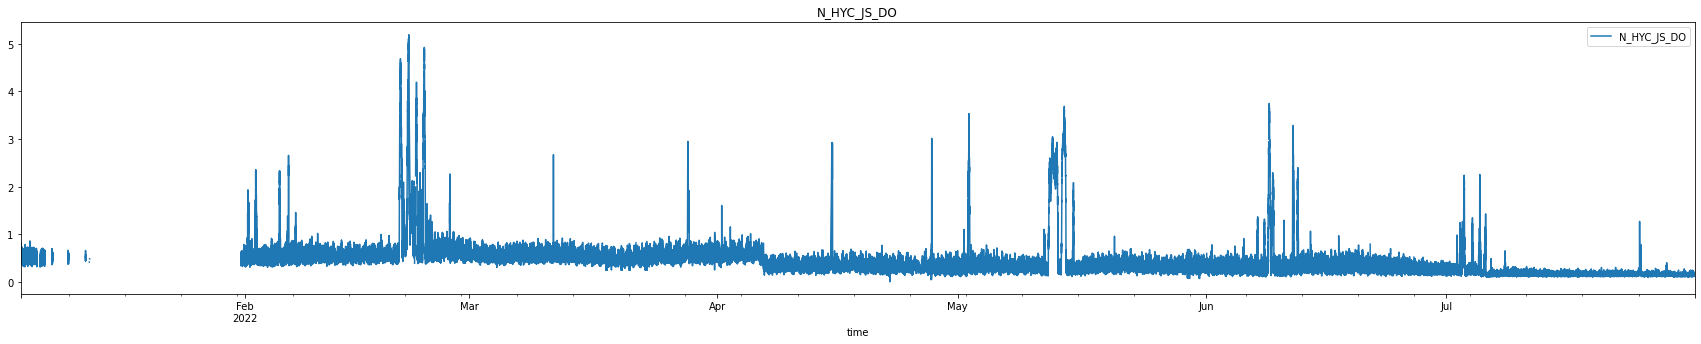

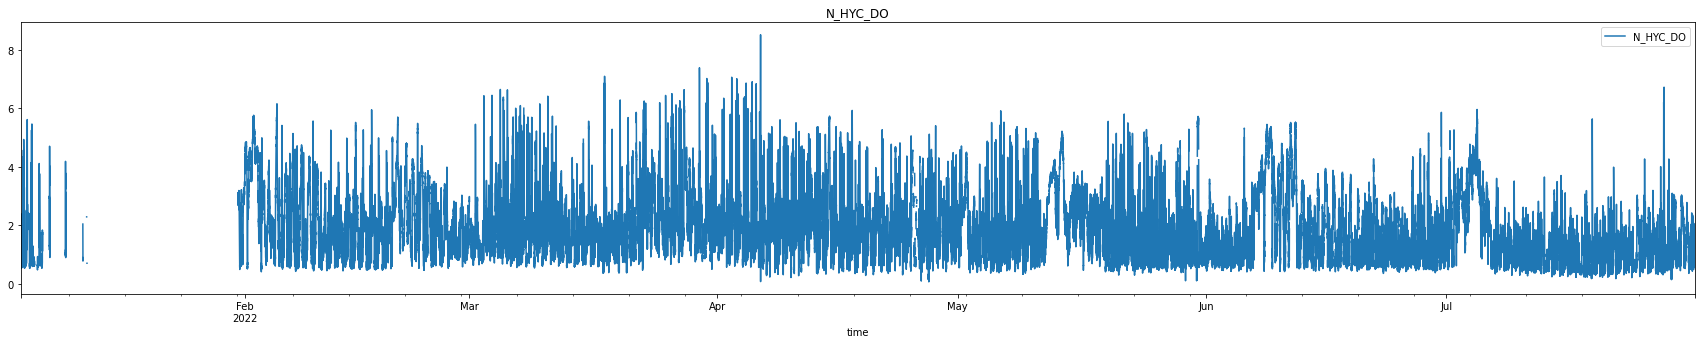

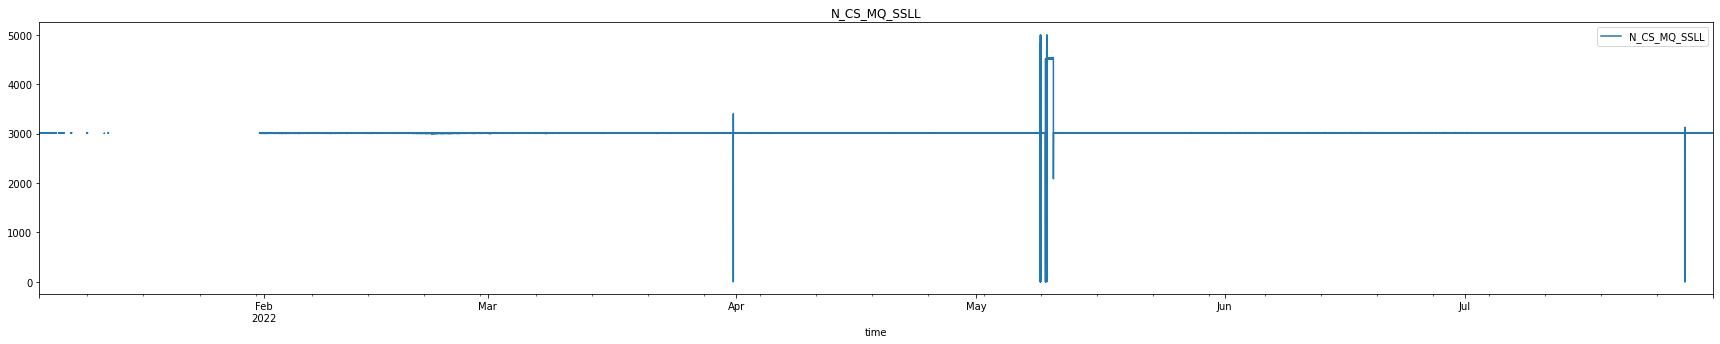

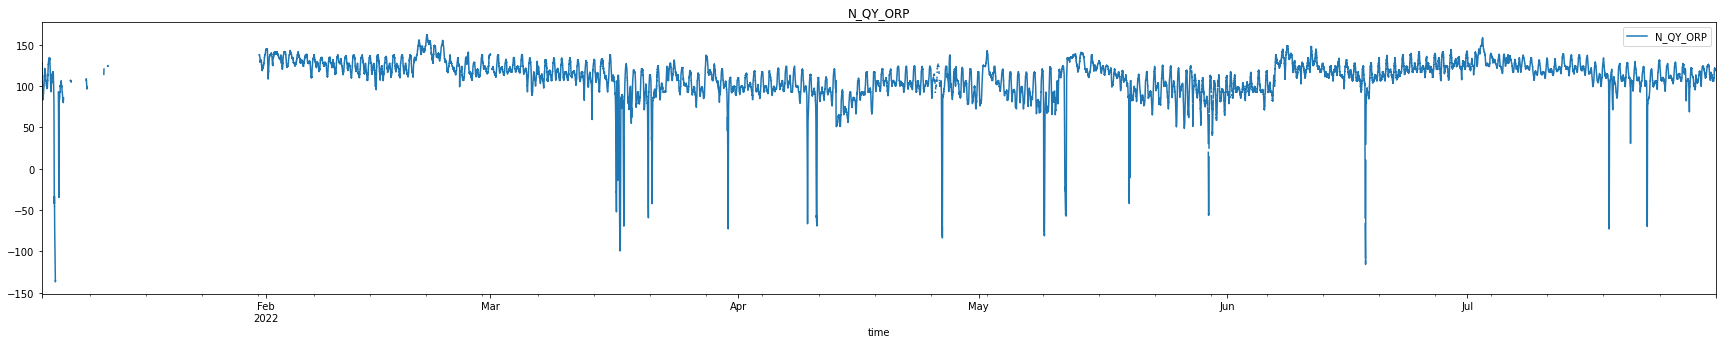

In [9]:
for feat in all_features:
    data.plot(x='time', y=feat, figsize=(30, 5), title=feat)